# The Data

In [1]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#import data 
train = pd.read_csv('../rossmann store sales/train.csv')
test = pd.read_csv('../rossmann store sales/test.csv')
store = pd.read_csv('../rossmann store sales/store.csv')

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [2]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Data Overview

In [4]:
print('Train')
print('Rows      :',train.shape[0])
print('Coloumns  :',train.shape[1])
print('\nFeatures : \n',train.columns.tolist())
print('\nMissing values :    ',train.isnull().sum().values.sum()) #check NaN
print('\nUnique values  :  \n',train.nunique())

print('-----------------------------------')
print('Test')
print('Rows      :',test.shape[0])
print('Coloumns  :',test.shape[1])
print('\nFeatures : \n',test.columns.tolist())
print('\nMissing values :    ',test.isnull().sum().values.sum())##check NaN
print('\nUnique values  :  \n',test.nunique())

print('-----------------------------------')
print('Store')
print('Rows      :',store.shape[0])
print('Coloumns  :',store.shape[1])
print('\nFeatures : \n',store.columns.tolist())
print('\nMissing values :    ',store.isnull().sum().values.sum())##check NaN
print('\nUnique values  :  \n',store.nunique())

Train
Rows      : 1017209
Coloumns  : 9

Features : 
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

Missing values :     0

Unique values  :  
 Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
-----------------------------------
Test
Rows      : 41088
Coloumns  : 8

Features : 
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

Missing values :     11

Unique values  :  
 Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64
-----------------------------------
Store
Rows      : 1115
Coloumns  : 10

Features : 
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionO

In [5]:
train['Date'] = pd.to_datetime(train['Date'])#check date
train['Date'].min(),train['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [6]:
test['Date'] = pd.to_datetime(test['Date'])#check date
test['Date'].min(),test['Date'].max() 

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [7]:
test.isnull().sum(axis=0)

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [8]:
test[test.isnull().values==True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [9]:
print(store['PromoInterval'].value_counts())

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64


In [10]:
store.isnull().sum(axis=0)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
store[store.isnull().values==True]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Data Preprocessing

In [12]:
test.fillna(1, inplace=True) #0 = closed, 1 = open
test.isnull().sum(axis=0)

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [14]:
store.fillna(0, inplace=True)
store.isnull().sum(axis=0)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train['DayOfWeek'] = train.Date.dt.dayofweek
train['WeekOfYear'] = train.Date.dt.weekofyear
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [16]:
test['Year'] = test.Date.dt.year
test['Month'] = test.Date.dt.month
test['Day'] = test.Date.dt.day
test['DayOfWeek'] = test.Date.dt.dayofweek
test['WeekOfYear'] = test.Date.dt.weekofyear
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,1,3,2015-09-17,1.0,1,0,0,2015,9,17,38
1,2,3,3,2015-09-17,1.0,1,0,0,2015,9,17,38
2,3,7,3,2015-09-17,1.0,1,0,0,2015,9,17,38
3,4,8,3,2015-09-17,1.0,1,0,0,2015,9,17,38
4,5,9,3,2015-09-17,1.0,1,0,0,2015,9,17,38


In [17]:
train['SalePerCustomer'] = train['Sales'] / train['Customers']

In [18]:
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [19]:
train = train[train['Open'] != 0]
train = train[train['Sales'] > 0]

In [20]:
train_store = pd.merge(train, store, on='Store')
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,3,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,2,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,1,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,0,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [21]:
#Competition Open
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

#Promo time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train.WeekOfYear - train_store.Promo2SinceWeek) / 4.0
train_store['PromoOpen'] = train_store.PromoOpen.apply(lambda x: x if x > 0 else 0)
train_store.loc[train_store.Promo2SinceYear == 0, 'PromoOpen'] = 0

In [22]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   Year                       844338 non-null  int64         
 10  Month                      844338 non-null  int64         
 11  Day                        844338 non-null  int64   

In [23]:
test_store = pd.merge(test, store, on='Store')
test_store.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,3,2015-09-17,1.0,1,0,0,2015,9,...,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,2,2015-09-16,1.0,1,0,0,2015,9,...,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,1,2015-09-15,1.0,1,0,0,2015,9,...,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,0,2015-09-14,1.0,1,0,0,2015,9,...,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,6,2015-09-13,0.0,0,0,0,2015,9,...,37,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [24]:
#Competition Open Time
test_store['CompetitionOpen'] = 12 * (test_store.Year - test_store.CompetitionOpenSinceYear) + \
        (test_store.Month - test_store.CompetitionOpenSinceMonth)
#Promo Time
test_store['PromoOpen'] = 12 * (test_store.Year - test_store.Promo2SinceYear) + \
        (train.WeekOfYear - test_store.Promo2SinceWeek) / 4.0
test_store['PromoOpen'] = test_store.PromoOpen.apply(lambda x: x if x > 0 else 0)
test_store.loc[test_store.Promo2SinceYear == 0, 'PromoOpen'] = 0

In [25]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   Year                       41088 non-null  int64         
 9   Month                      41088 non-null  int64         
 10  Day                        41088 non-null  int64         
 11  WeekOfYear                 41088 non-null  int64         
 12  Stor

# Data Analysis

In [26]:
train_store.Sales.describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='StoreType'>

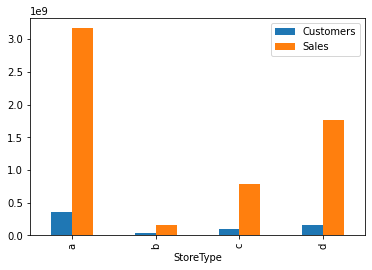

In [27]:
train_store.groupby('StoreType')['Customers','Sales'].sum().plot.bar()

Text(0.5, 1.0, 'Sales distribution')

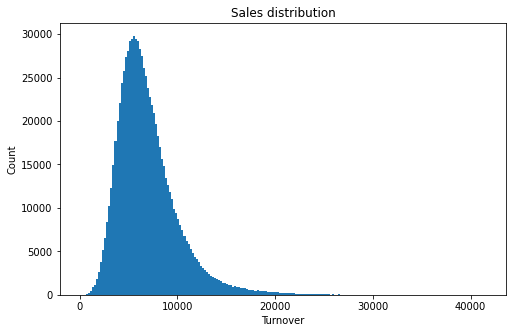

In [28]:
plt.figure(figsize=(8, 5))#Sales distribution
plt.hist(train_store.Sales, bins=200)
plt.xlabel('Turnover')
plt.ylabel('Count')
plt.title('Sales distribution')

Text(0.5, 1.0, 'Log(Sales) distribution')

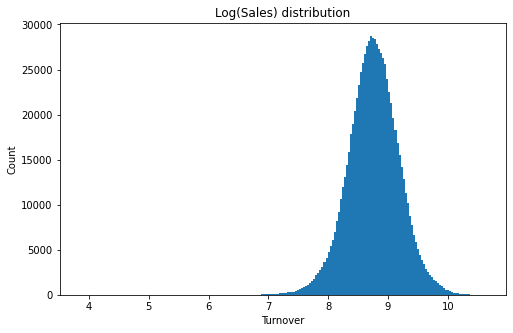

In [29]:
plt.figure(figsize=(8, 5))#Log sales distribution
plt.hist(np.log1p(train_store.Sales), bins=200)
plt.xlabel('Turnover')
plt.ylabel('Count')
plt.title('Log(Sales) distribution')

Text(0.5, 1.0, 'Customers distribution')

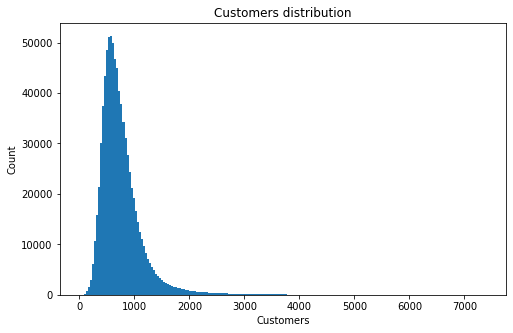

In [30]:
plt.figure(figsize=(8, 5))#Customers distribution
plt.hist(train_store.Customers, bins=200)
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Customers distribution')

Text(0.5, 1.0, 'Log(Customers) distribution')

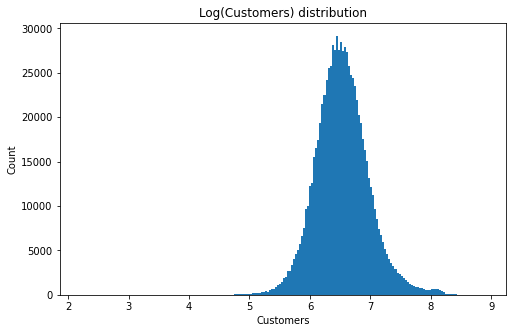

In [31]:
plt.figure(figsize=(8, 5))# Log Customers distribution
plt.hist(np.log1p(train_store.Customers), bins=200)
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Log(Customers) distribution')

<AxesSubplot:xlabel='Year', ylabel='Customers'>

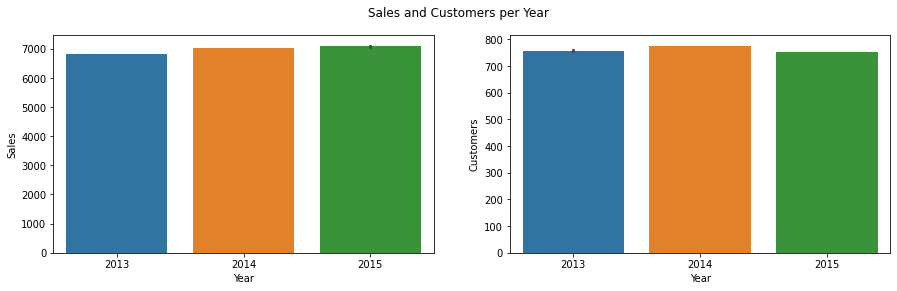

In [32]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,4))#Sales and Customers per Year 
fig.suptitle('Sales and Customers per Year')

sns.barplot(x='Year', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='Year', y='Customers', data=train_store, ax=axis2)

Text(0.5, 1.0, 'Average Sales and Number of Customers per Month')

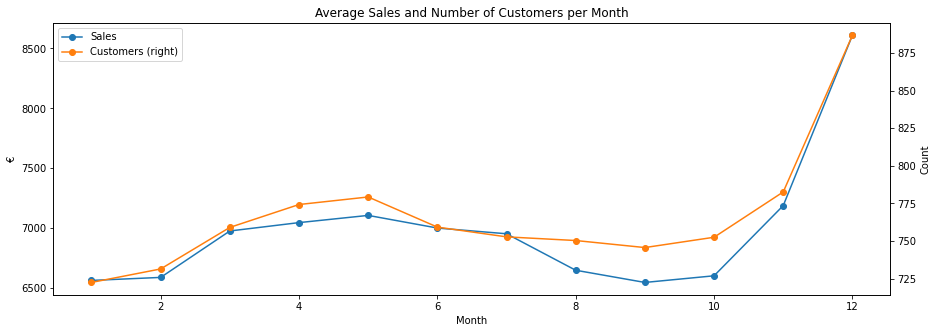

In [33]:
ax = train_store.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15, 5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
plt.title('Average Sales and Number of Customers per Month')#Average Sales and Number of Customers per Month

Text(0.5, 1.0, 'Average Sales and Number of Customers per Day Of Week')

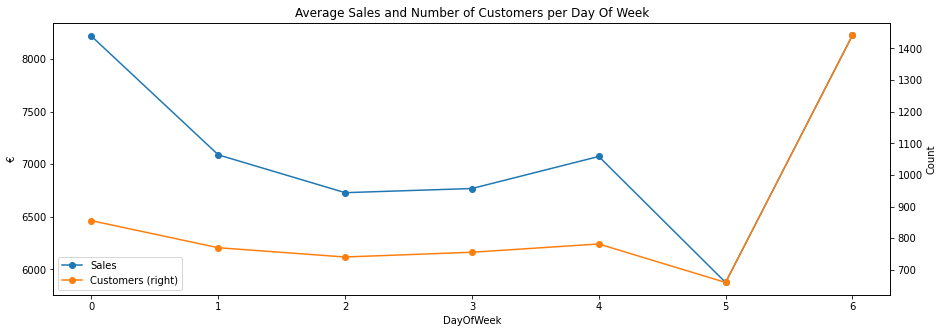

In [34]:
ax = train_store.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15, 5),marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
plt.title('Average Sales and Number of Customers per Day Of Week')#Average Sales/Customers per Day Of Week

Text(0.5, 1.0, 'Average Sales per day of week')

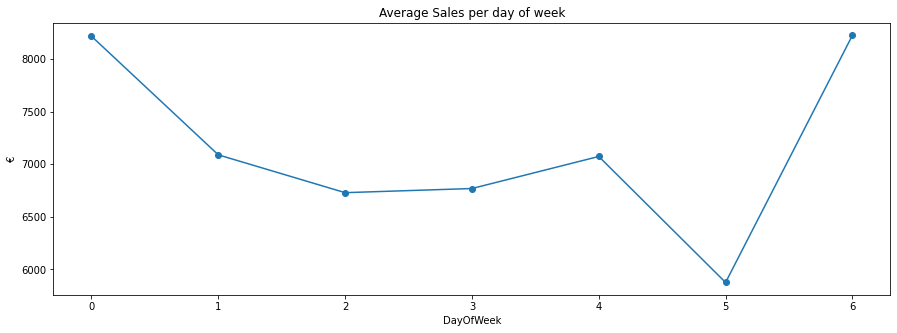

In [35]:
ax = train_store.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(15, 5), marker='o')
plt.ylabel('€')
plt.title('Average Sales per day of week')#Average Sales per day of week

Text(0.5, 1.0, 'Average Customers per day of week')

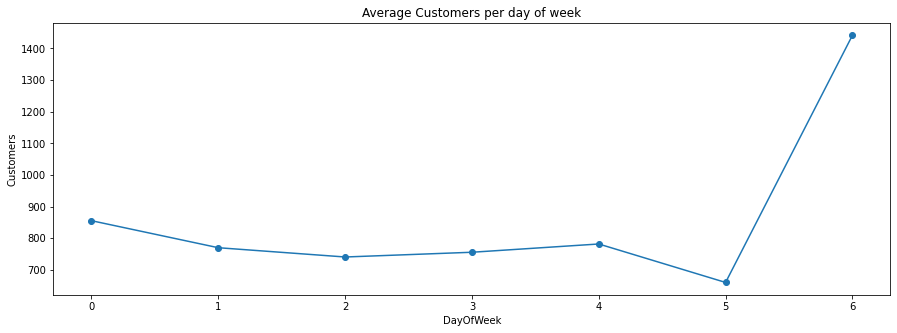

In [36]:
ax = train_store.groupby('DayOfWeek')['Customers'].mean().plot(figsize=(15, 5), marker='o')
plt.ylabel('Customers') 
plt.title('Average Customers per day of week')#Average Customers per day of week

Text(0.5, 1.0, 'Sales per Week of Year')

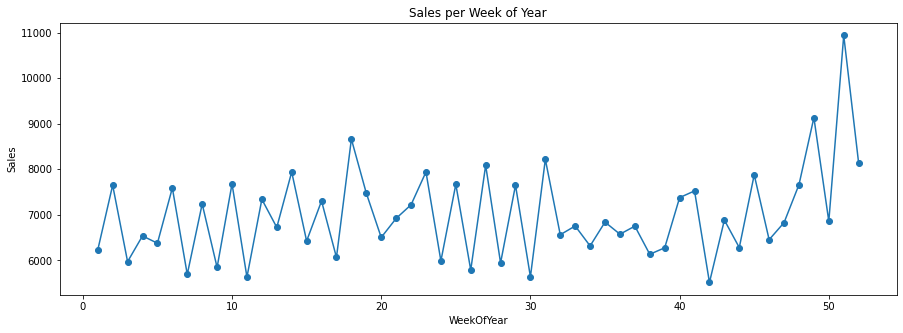

In [37]:
#Sales per Week of Year
ax = train_store.groupby('WeekOfYear')['Sales'].mean().plot(figsize=(15, 5), marker='o')
plt.ylabel('Sales')
plt.title('Sales per Week of Year')

<AxesSubplot:xlabel='StateHoliday', ylabel='Customers'>

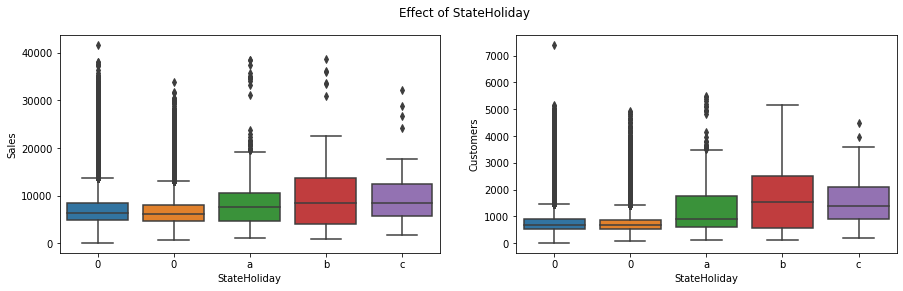

In [38]:
#Effect of StateHoliday
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Effect of StateHoliday')

sns.boxplot(x='StateHoliday', y='Sales', data=train_store, ax=axis1)
sns.boxplot(x='StateHoliday', y='Customers', data=train_store, ax=axis2)


<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

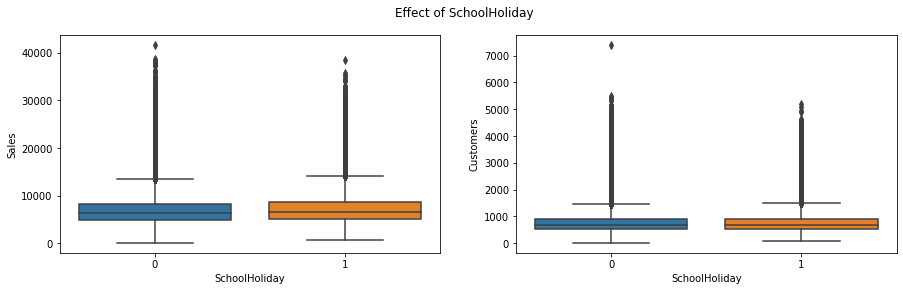

In [39]:
#Effect of SchoolHoliday
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
fig.suptitle('Effect of SchoolHoliday')

sns.boxplot(x='SchoolHoliday', y='Sales', data=train_store, ax=axis1)
sns.boxplot(x='SchoolHoliday', y='Customers', data=train_store, ax=axis2)

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

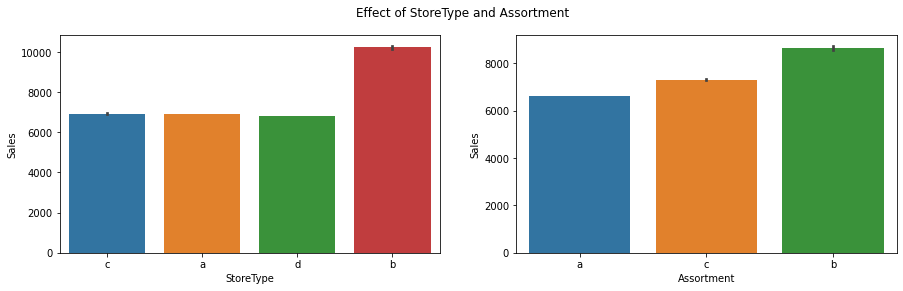

In [40]:
#Effect of StoreType and Assortment
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Effect of StoreType and Assortment ')

sns.barplot(x='StoreType', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='Assortment', y='Sales', data=train_store, ax=axis2)

Text(0.5, 1.0, 'Sales & Competition Distance')

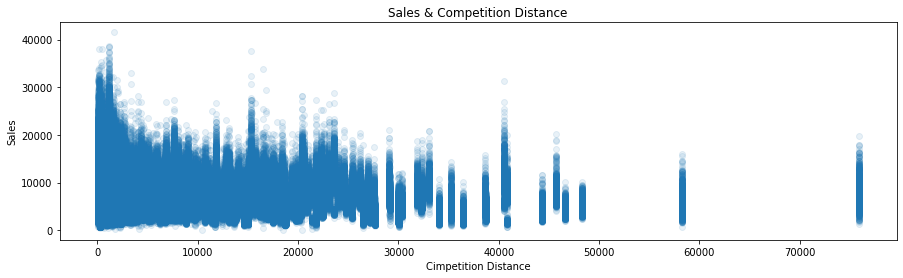

In [41]:
#Sales & Competition Distance
plt.figure(figsize=(15, 4))
plt.scatter(data=train_store, x='CompetitionDistance', y='Sales', alpha=0.1)
plt.xlabel('Cimpetition Distance')
plt.ylabel('Sales')
plt.title('Sales & Competition Distance')

<AxesSubplot:xlabel='Promo2', ylabel='Sales'>

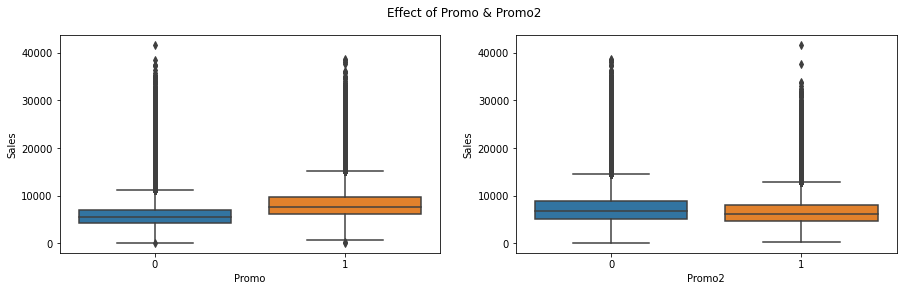

In [42]:
#Effect of Promo & Promo2
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Effect of Promo & Promo2')

sns.boxplot(x='Promo', y='Sales', data=train_store, ax=axis1)
sns.boxplot(x='Promo2', y='Sales', data=train_store, ax=axis2)

Text(0.5, 1.0, 'Sales & CompetitionOpen')

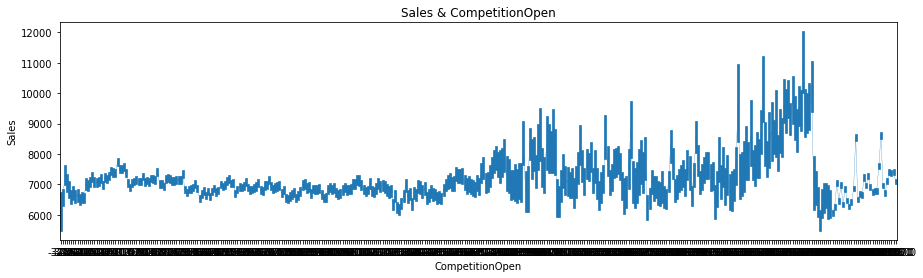

In [43]:
#Sales & CompetitionOpen
plt.figure(figsize=(15, 4))
sns.pointplot(data=train_store, x='CompetitionOpen', y='Sales', scale=0.1)
plt.title("Sales & CompetitionOpen")

Text(0.5, 1.0, 'Sales & PromoOpen')

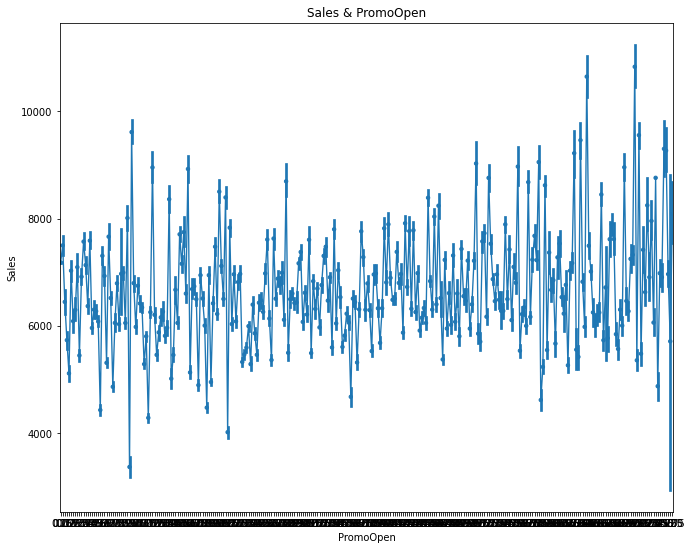

In [44]:
#Sales & PromoOpen
plt.figure(figsize=(11, 9))
sns.pointplot(data=train_store, x='PromoOpen', y='Sales', scale=0.5)
plt.title("Sales & PromoOpen")

Text(0.5, 1.0, 'Sales & PromoInterval')

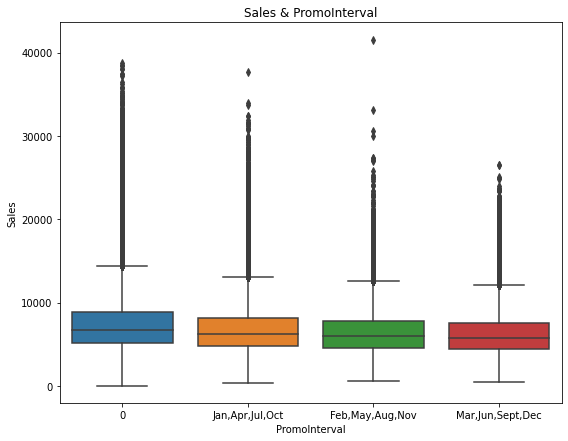

In [45]:
#Sales & PromoInterval
plt.figure(figsize=(9, 7))
sns.boxplot(data=train_store, x='PromoInterval', y='Sales')
plt.title("Sales & PromoInterval")

In [46]:
#train
mappings = {'0':0,'a':1, 'b':2, 'c':3, 'd':4}
train_store.StateHoliday.replace(mappings, inplace=True)
train_store.StoreType.replace(mappings, inplace=True)
train_store.Assortment.replace(mappings, inplace=True)

#test
test_store.StateHoliday.replace(mappings, inplace=True)
test_store.StoreType.replace(mappings, inplace=True)
test_store.Assortment.replace(mappings, inplace=True)

In [47]:
mappings = {'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3}
train_store.PromoInterval.replace(mappings, inplace=True)
test_store.PromoInterval.replace(mappings, inplace=True)

In [48]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  int64         
 8   SchoolHoliday              844338 non-null  int64         
 9   Year                       844338 non-null  int64         
 10  Month                      844338 non-null  int64         
 11  Day                        844338 non-null  int64   

In [49]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  int64         
 7   SchoolHoliday              41088 non-null  int64         
 8   Year                       41088 non-null  int64         
 9   Month                      41088 non-null  int64         
 10  Day                        41088 non-null  int64         
 11  WeekOfYear                 41088 non-null  int64         
 12  Stor

# Model Building

In [50]:
Xy_train = train_store[train_store.Date >= '6/19/2015']#Split train/valid set
Xy_valid = train_store[train_store.Date < '6/19/2015']

In [51]:
train_drop_features = ['Sales', 'Date', 'Customers', 'Open', 'PromoInterval','SalePerCustomer']

X_train = Xy_train.drop(train_drop_features, axis=1)
y_train = Xy_train['Sales']
y_train = np.log1p(y_train)

X_valid = Xy_train.drop(train_drop_features, axis=1)
y_valid = Xy_train['Sales']
y_valid = np.log1p(y_valid)

In [52]:
test_drop_features = ['Id', 'Date', 'Open', 'PromoInterval']
X_test = test_store.drop(test_drop_features, axis=1)

In [53]:
#define rmspe
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

# XGBoost

In [54]:
import xgboost as xgb

In [55]:
xgbtrain = xgb.DMatrix(X_train, label = y_train)
xgbvalid = xgb.DMatrix(X_valid, label = y_valid)

In [56]:
xgb_params = {'objective': 'reg:linear', 
          'booster': 'gbtree',      
          'eta': 0.01,            #learning rate
          'max_depth': 10,      #10,9,8
          'subsample': 0.9,        
          'colsample_bytree': 0.7,            
          'seed': 42,
             }
num_boost_round = 4000

In [73]:
%%time
watchlist = [(xgbtrain, 'train'), (xgbvalid, 'eval')] 
xgb_model = xgb.train(xgb_params,
                      xgbtrain,
                      num_boost_round,
                      evals = watchlist,
                      early_stopping_rounds = 300,
                      feval = rmspe_xg,
                      verbose_eval = True)

[16:18:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:8.19555	train-rmspe:0.99987	eval-rmse:8.19555	eval-rmspe:0.99987
[1]	train-rmse:8.11378	train-rmspe:0.99984	eval-rmse:8.11378	eval-rmspe:0.99984
[2]	train-rmse:8.03282	train-rmspe:0.99981	eval-rmse:8.03282	eval-rmspe:0.99981
[3]	train-rmse:7.95267	train-rmspe:0.99978	eval-rmse:7.95267	eval-rmspe:0.99978
[4]	train-rmse:7.87331	train-rmspe:0.99975	eval-rmse:7.87331	eval-rmspe:0.99975
[5]	train-rmse:7.79476	train-rmspe:0.99972	eval-rmse:7.79476	eval-rmspe:0.99972
[6]	train-rmse:7.71699	train-rmspe:0.99968	eval-rmse:7.71699	eval-rmspe:0.99968
[7]	train-rmse:7.64001	train-rmspe:0.99964	eval-rmse:7.64001	eval-rmspe:0.99964
[8]	train-rmse:7.56379	train-rmspe:0.99960	eval-rmse:7.56379	eval-rmspe:0.99960
[9]	train-rmse:7.48836	train-rmspe:0.99955	eval-rmse

[99]	train-rmse:3.04793	train-rmspe:0.94875	eval-rmse:3.04793	eval-rmspe:0.94875
[100]	train-rmse:3.01784	train-rmspe:0.94719	eval-rmse:3.01784	eval-rmspe:0.94719
[101]	train-rmse:2.98803	train-rmspe:0.94559	eval-rmse:2.98803	eval-rmspe:0.94559
[102]	train-rmse:2.95853	train-rmspe:0.94397	eval-rmse:2.95853	eval-rmspe:0.94397
[103]	train-rmse:2.92934	train-rmspe:0.94231	eval-rmse:2.92934	eval-rmspe:0.94231
[104]	train-rmse:2.90044	train-rmspe:0.94063	eval-rmse:2.90044	eval-rmspe:0.94063
[105]	train-rmse:2.87183	train-rmspe:0.93890	eval-rmse:2.87183	eval-rmspe:0.93890
[106]	train-rmse:2.84349	train-rmspe:0.93716	eval-rmse:2.84349	eval-rmspe:0.93716
[107]	train-rmse:2.81544	train-rmspe:0.93539	eval-rmse:2.81544	eval-rmspe:0.93539
[108]	train-rmse:2.78769	train-rmspe:0.93357	eval-rmse:2.78769	eval-rmspe:0.93357
[109]	train-rmse:2.76021	train-rmspe:0.93173	eval-rmse:2.76021	eval-rmspe:0.93173
[110]	train-rmse:2.73301	train-rmspe:0.92985	eval-rmse:2.73301	eval-rmspe:0.92985
[111]	train-rmse:

[199]	train-rmse:1.15026	train-rmspe:0.66426	eval-rmse:1.15026	eval-rmspe:0.66426
[200]	train-rmse:1.13939	train-rmspe:0.66069	eval-rmse:1.13939	eval-rmspe:0.66069
[201]	train-rmse:1.12871	train-rmspe:0.65711	eval-rmse:1.12871	eval-rmspe:0.65711
[202]	train-rmse:1.11814	train-rmspe:0.65353	eval-rmse:1.11814	eval-rmspe:0.65353
[203]	train-rmse:1.10762	train-rmspe:0.64998	eval-rmse:1.10762	eval-rmspe:0.64998
[204]	train-rmse:1.09726	train-rmspe:0.64641	eval-rmse:1.09726	eval-rmspe:0.64641
[205]	train-rmse:1.08696	train-rmspe:0.64286	eval-rmse:1.08696	eval-rmspe:0.64286
[206]	train-rmse:1.07676	train-rmspe:0.63930	eval-rmse:1.07676	eval-rmspe:0.63930
[207]	train-rmse:1.06672	train-rmspe:0.63574	eval-rmse:1.06672	eval-rmspe:0.63574
[208]	train-rmse:1.05681	train-rmspe:0.63218	eval-rmse:1.05681	eval-rmspe:0.63218
[209]	train-rmse:1.04692	train-rmspe:0.62863	eval-rmse:1.04692	eval-rmspe:0.62863
[210]	train-rmse:1.03722	train-rmspe:0.62508	eval-rmse:1.03722	eval-rmspe:0.62508
[211]	train-rmse

[299]	train-rmse:0.48112	train-rmspe:0.36119	eval-rmse:0.48112	eval-rmspe:0.36119
[300]	train-rmse:0.47746	train-rmspe:0.35903	eval-rmse:0.47746	eval-rmspe:0.35903
[301]	train-rmse:0.47385	train-rmspe:0.35691	eval-rmse:0.47385	eval-rmspe:0.35691
[302]	train-rmse:0.47031	train-rmspe:0.35480	eval-rmse:0.47031	eval-rmspe:0.35480
[303]	train-rmse:0.46683	train-rmspe:0.35274	eval-rmse:0.46683	eval-rmspe:0.35274
[304]	train-rmse:0.46339	train-rmspe:0.35070	eval-rmse:0.46339	eval-rmspe:0.35070
[305]	train-rmse:0.45991	train-rmspe:0.34864	eval-rmse:0.45991	eval-rmspe:0.34864
[306]	train-rmse:0.45654	train-rmspe:0.34664	eval-rmse:0.45654	eval-rmspe:0.34664
[307]	train-rmse:0.45327	train-rmspe:0.34468	eval-rmse:0.45327	eval-rmspe:0.34468
[308]	train-rmse:0.44990	train-rmspe:0.34267	eval-rmse:0.44990	eval-rmspe:0.34267
[309]	train-rmse:0.44663	train-rmspe:0.34072	eval-rmse:0.44663	eval-rmspe:0.34072
[310]	train-rmse:0.44340	train-rmspe:0.33879	eval-rmse:0.44340	eval-rmspe:0.33879
[311]	train-rmse

[399]	train-rmse:0.26937	train-rmspe:0.23477	eval-rmse:0.26937	eval-rmspe:0.23477
[400]	train-rmse:0.26829	train-rmspe:0.23417	eval-rmse:0.26829	eval-rmspe:0.23417
[401]	train-rmse:0.26731	train-rmspe:0.23363	eval-rmse:0.26731	eval-rmspe:0.23363
[402]	train-rmse:0.26637	train-rmspe:0.23314	eval-rmse:0.26637	eval-rmspe:0.23314
[403]	train-rmse:0.26542	train-rmspe:0.23262	eval-rmse:0.26542	eval-rmspe:0.23262
[404]	train-rmse:0.26454	train-rmspe:0.23219	eval-rmse:0.26454	eval-rmspe:0.23219
[405]	train-rmse:0.26322	train-rmspe:0.23136	eval-rmse:0.26322	eval-rmspe:0.23136
[406]	train-rmse:0.26225	train-rmspe:0.23081	eval-rmse:0.26225	eval-rmspe:0.23081
[407]	train-rmse:0.26115	train-rmspe:0.23016	eval-rmse:0.26115	eval-rmspe:0.23016
[408]	train-rmse:0.26022	train-rmspe:0.22965	eval-rmse:0.26022	eval-rmspe:0.22965
[409]	train-rmse:0.25935	train-rmspe:0.22920	eval-rmse:0.25935	eval-rmspe:0.22920
[410]	train-rmse:0.25840	train-rmspe:0.22870	eval-rmse:0.25840	eval-rmspe:0.22870
[411]	train-rmse

[499]	train-rmse:0.20708	train-rmspe:0.20157	eval-rmse:0.20708	eval-rmspe:0.20157
[500]	train-rmse:0.20666	train-rmspe:0.20131	eval-rmse:0.20666	eval-rmspe:0.20131
[501]	train-rmse:0.20646	train-rmspe:0.20127	eval-rmse:0.20646	eval-rmspe:0.20127
[502]	train-rmse:0.20627	train-rmspe:0.20124	eval-rmse:0.20627	eval-rmspe:0.20124
[503]	train-rmse:0.20606	train-rmspe:0.20120	eval-rmse:0.20606	eval-rmspe:0.20120
[504]	train-rmse:0.20584	train-rmspe:0.20112	eval-rmse:0.20584	eval-rmspe:0.20112
[505]	train-rmse:0.20551	train-rmspe:0.20096	eval-rmse:0.20551	eval-rmspe:0.20096
[506]	train-rmse:0.20509	train-rmspe:0.20069	eval-rmse:0.20509	eval-rmspe:0.20069
[507]	train-rmse:0.20481	train-rmspe:0.20055	eval-rmse:0.20481	eval-rmspe:0.20055
[508]	train-rmse:0.20431	train-rmspe:0.20020	eval-rmse:0.20431	eval-rmspe:0.20020
[509]	train-rmse:0.20407	train-rmspe:0.20012	eval-rmse:0.20407	eval-rmspe:0.20012
[510]	train-rmse:0.20379	train-rmspe:0.19998	eval-rmse:0.20379	eval-rmspe:0.19998
[511]	train-rmse

[599]	train-rmse:0.18205	train-rmspe:0.18603	eval-rmse:0.18205	eval-rmspe:0.18603
[600]	train-rmse:0.18185	train-rmspe:0.18589	eval-rmse:0.18185	eval-rmspe:0.18589
[601]	train-rmse:0.18149	train-rmspe:0.18558	eval-rmse:0.18149	eval-rmspe:0.18558
[602]	train-rmse:0.18142	train-rmspe:0.18556	eval-rmse:0.18142	eval-rmspe:0.18556
[603]	train-rmse:0.18110	train-rmspe:0.18528	eval-rmse:0.18110	eval-rmspe:0.18528
[604]	train-rmse:0.18090	train-rmspe:0.18513	eval-rmse:0.18090	eval-rmspe:0.18513
[605]	train-rmse:0.18074	train-rmspe:0.18503	eval-rmse:0.18074	eval-rmspe:0.18503
[606]	train-rmse:0.18051	train-rmspe:0.18484	eval-rmse:0.18051	eval-rmspe:0.18484
[607]	train-rmse:0.18013	train-rmspe:0.18448	eval-rmse:0.18013	eval-rmspe:0.18448
[608]	train-rmse:0.17997	train-rmspe:0.18434	eval-rmse:0.17997	eval-rmspe:0.18434
[609]	train-rmse:0.17979	train-rmspe:0.18421	eval-rmse:0.17979	eval-rmspe:0.18421
[610]	train-rmse:0.17974	train-rmspe:0.18422	eval-rmse:0.17974	eval-rmspe:0.18422
[611]	train-rmse

[699]	train-rmse:0.16330	train-rmspe:0.16961	eval-rmse:0.16330	eval-rmspe:0.16961
[700]	train-rmse:0.16314	train-rmspe:0.16946	eval-rmse:0.16314	eval-rmspe:0.16946
[701]	train-rmse:0.16302	train-rmspe:0.16935	eval-rmse:0.16302	eval-rmspe:0.16935
[702]	train-rmse:0.16288	train-rmspe:0.16921	eval-rmse:0.16288	eval-rmspe:0.16921
[703]	train-rmse:0.16263	train-rmspe:0.16895	eval-rmse:0.16263	eval-rmspe:0.16895
[704]	train-rmse:0.16254	train-rmspe:0.16887	eval-rmse:0.16254	eval-rmspe:0.16887
[705]	train-rmse:0.16232	train-rmspe:0.16867	eval-rmse:0.16232	eval-rmspe:0.16867
[706]	train-rmse:0.16217	train-rmspe:0.16852	eval-rmse:0.16217	eval-rmspe:0.16852
[707]	train-rmse:0.16199	train-rmspe:0.16835	eval-rmse:0.16199	eval-rmspe:0.16835
[708]	train-rmse:0.16176	train-rmspe:0.16813	eval-rmse:0.16176	eval-rmspe:0.16813
[709]	train-rmse:0.16153	train-rmspe:0.16789	eval-rmse:0.16153	eval-rmspe:0.16789
[710]	train-rmse:0.16140	train-rmspe:0.16778	eval-rmse:0.16140	eval-rmspe:0.16778
[711]	train-rmse

[799]	train-rmse:0.14884	train-rmspe:0.15533	eval-rmse:0.14884	eval-rmspe:0.15533
[800]	train-rmse:0.14877	train-rmspe:0.15526	eval-rmse:0.14877	eval-rmspe:0.15526
[801]	train-rmse:0.14869	train-rmspe:0.15519	eval-rmse:0.14869	eval-rmspe:0.15519
[802]	train-rmse:0.14860	train-rmspe:0.15506	eval-rmse:0.14860	eval-rmspe:0.15506
[803]	train-rmse:0.14858	train-rmspe:0.15505	eval-rmse:0.14858	eval-rmspe:0.15505
[804]	train-rmse:0.14852	train-rmspe:0.15499	eval-rmse:0.14852	eval-rmspe:0.15499
[805]	train-rmse:0.14844	train-rmspe:0.15491	eval-rmse:0.14844	eval-rmspe:0.15491
[806]	train-rmse:0.14830	train-rmspe:0.15474	eval-rmse:0.14830	eval-rmspe:0.15474
[807]	train-rmse:0.14817	train-rmspe:0.15463	eval-rmse:0.14817	eval-rmspe:0.15463
[808]	train-rmse:0.14796	train-rmspe:0.15441	eval-rmse:0.14796	eval-rmspe:0.15441
[809]	train-rmse:0.14783	train-rmspe:0.15429	eval-rmse:0.14783	eval-rmspe:0.15429
[810]	train-rmse:0.14770	train-rmspe:0.15416	eval-rmse:0.14770	eval-rmspe:0.15416
[811]	train-rmse

[899]	train-rmse:0.13649	train-rmspe:0.14247	eval-rmse:0.13649	eval-rmspe:0.14247
[900]	train-rmse:0.13639	train-rmspe:0.14236	eval-rmse:0.13639	eval-rmspe:0.14236
[901]	train-rmse:0.13626	train-rmspe:0.14222	eval-rmse:0.13626	eval-rmspe:0.14222
[902]	train-rmse:0.13618	train-rmspe:0.14215	eval-rmse:0.13618	eval-rmspe:0.14215
[903]	train-rmse:0.13598	train-rmspe:0.14194	eval-rmse:0.13598	eval-rmspe:0.14194
[904]	train-rmse:0.13591	train-rmspe:0.14185	eval-rmse:0.13591	eval-rmspe:0.14185
[905]	train-rmse:0.13581	train-rmspe:0.14176	eval-rmse:0.13581	eval-rmspe:0.14176
[906]	train-rmse:0.13572	train-rmspe:0.14166	eval-rmse:0.13572	eval-rmspe:0.14166
[907]	train-rmse:0.13556	train-rmspe:0.14149	eval-rmse:0.13556	eval-rmspe:0.14149
[908]	train-rmse:0.13545	train-rmspe:0.14137	eval-rmse:0.13545	eval-rmspe:0.14137
[909]	train-rmse:0.13539	train-rmspe:0.14131	eval-rmse:0.13539	eval-rmspe:0.14131
[910]	train-rmse:0.13527	train-rmspe:0.14118	eval-rmse:0.13527	eval-rmspe:0.14118
[911]	train-rmse

[999]	train-rmse:0.12696	train-rmspe:0.13243	eval-rmse:0.12696	eval-rmspe:0.13243
[1000]	train-rmse:0.12683	train-rmspe:0.13229	eval-rmse:0.12683	eval-rmspe:0.13229
[1001]	train-rmse:0.12676	train-rmspe:0.13222	eval-rmse:0.12676	eval-rmspe:0.13222
[1002]	train-rmse:0.12658	train-rmspe:0.13200	eval-rmse:0.12658	eval-rmspe:0.13200
[1003]	train-rmse:0.12652	train-rmspe:0.13194	eval-rmse:0.12652	eval-rmspe:0.13194
[1004]	train-rmse:0.12646	train-rmspe:0.13187	eval-rmse:0.12646	eval-rmspe:0.13187
[1005]	train-rmse:0.12627	train-rmspe:0.13167	eval-rmse:0.12627	eval-rmspe:0.13167
[1006]	train-rmse:0.12625	train-rmspe:0.13164	eval-rmse:0.12625	eval-rmspe:0.13164
[1007]	train-rmse:0.12608	train-rmspe:0.13147	eval-rmse:0.12608	eval-rmspe:0.13147
[1008]	train-rmse:0.12594	train-rmspe:0.13131	eval-rmse:0.12594	eval-rmspe:0.13131
[1009]	train-rmse:0.12589	train-rmspe:0.13126	eval-rmse:0.12589	eval-rmspe:0.13126
[1010]	train-rmse:0.12574	train-rmspe:0.13110	eval-rmse:0.12574	eval-rmspe:0.13110
[1011

[1098]	train-rmse:0.11829	train-rmspe:0.12326	eval-rmse:0.11829	eval-rmspe:0.12326
[1099]	train-rmse:0.11824	train-rmspe:0.12320	eval-rmse:0.11824	eval-rmspe:0.12320
[1100]	train-rmse:0.11820	train-rmspe:0.12316	eval-rmse:0.11820	eval-rmspe:0.12316
[1101]	train-rmse:0.11811	train-rmspe:0.12308	eval-rmse:0.11811	eval-rmspe:0.12308
[1102]	train-rmse:0.11806	train-rmspe:0.12302	eval-rmse:0.11806	eval-rmspe:0.12302
[1103]	train-rmse:0.11802	train-rmspe:0.12298	eval-rmse:0.11802	eval-rmspe:0.12298
[1104]	train-rmse:0.11797	train-rmspe:0.12292	eval-rmse:0.11797	eval-rmspe:0.12292
[1105]	train-rmse:0.11791	train-rmspe:0.12287	eval-rmse:0.11791	eval-rmspe:0.12287
[1106]	train-rmse:0.11789	train-rmspe:0.12284	eval-rmse:0.11789	eval-rmspe:0.12284
[1107]	train-rmse:0.11779	train-rmspe:0.12273	eval-rmse:0.11779	eval-rmspe:0.12273
[1108]	train-rmse:0.11762	train-rmspe:0.12254	eval-rmse:0.11762	eval-rmspe:0.12254
[1109]	train-rmse:0.11757	train-rmspe:0.12248	eval-rmse:0.11757	eval-rmspe:0.12248
[111

[1197]	train-rmse:0.11105	train-rmspe:0.11550	eval-rmse:0.11105	eval-rmspe:0.11550
[1198]	train-rmse:0.11099	train-rmspe:0.11543	eval-rmse:0.11099	eval-rmspe:0.11543
[1199]	train-rmse:0.11091	train-rmspe:0.11535	eval-rmse:0.11091	eval-rmspe:0.11535
[1200]	train-rmse:0.11089	train-rmspe:0.11533	eval-rmse:0.11089	eval-rmspe:0.11533
[1201]	train-rmse:0.11083	train-rmspe:0.11527	eval-rmse:0.11083	eval-rmspe:0.11527
[1202]	train-rmse:0.11070	train-rmspe:0.11512	eval-rmse:0.11070	eval-rmspe:0.11512
[1203]	train-rmse:0.11060	train-rmspe:0.11502	eval-rmse:0.11060	eval-rmspe:0.11502
[1204]	train-rmse:0.11055	train-rmspe:0.11497	eval-rmse:0.11055	eval-rmspe:0.11497
[1205]	train-rmse:0.11047	train-rmspe:0.11488	eval-rmse:0.11047	eval-rmspe:0.11488
[1206]	train-rmse:0.11043	train-rmspe:0.11485	eval-rmse:0.11043	eval-rmspe:0.11485
[1207]	train-rmse:0.11039	train-rmspe:0.11480	eval-rmse:0.11039	eval-rmspe:0.11480
[1208]	train-rmse:0.11035	train-rmspe:0.11476	eval-rmse:0.11035	eval-rmspe:0.11476
[120

[1296]	train-rmse:0.10433	train-rmspe:0.10835	eval-rmse:0.10433	eval-rmspe:0.10835
[1297]	train-rmse:0.10431	train-rmspe:0.10833	eval-rmse:0.10431	eval-rmspe:0.10833
[1298]	train-rmse:0.10424	train-rmspe:0.10826	eval-rmse:0.10424	eval-rmspe:0.10826
[1299]	train-rmse:0.10419	train-rmspe:0.10821	eval-rmse:0.10419	eval-rmspe:0.10821
[1300]	train-rmse:0.10410	train-rmspe:0.10811	eval-rmse:0.10410	eval-rmspe:0.10811
[1301]	train-rmse:0.10402	train-rmspe:0.10802	eval-rmse:0.10402	eval-rmspe:0.10802
[1302]	train-rmse:0.10396	train-rmspe:0.10796	eval-rmse:0.10396	eval-rmspe:0.10796
[1303]	train-rmse:0.10390	train-rmspe:0.10790	eval-rmse:0.10390	eval-rmspe:0.10790
[1304]	train-rmse:0.10386	train-rmspe:0.10784	eval-rmse:0.10386	eval-rmspe:0.10784
[1305]	train-rmse:0.10376	train-rmspe:0.10774	eval-rmse:0.10376	eval-rmspe:0.10774
[1306]	train-rmse:0.10370	train-rmspe:0.10767	eval-rmse:0.10370	eval-rmspe:0.10767
[1307]	train-rmse:0.10364	train-rmspe:0.10761	eval-rmse:0.10364	eval-rmspe:0.10761
[130

[1395]	train-rmse:0.09843	train-rmspe:0.10197	eval-rmse:0.09843	eval-rmspe:0.10197
[1396]	train-rmse:0.09836	train-rmspe:0.10191	eval-rmse:0.09836	eval-rmspe:0.10191
[1397]	train-rmse:0.09833	train-rmspe:0.10187	eval-rmse:0.09833	eval-rmspe:0.10187
[1398]	train-rmse:0.09827	train-rmspe:0.10181	eval-rmse:0.09827	eval-rmspe:0.10181
[1399]	train-rmse:0.09827	train-rmspe:0.10180	eval-rmse:0.09827	eval-rmspe:0.10180
[1400]	train-rmse:0.09812	train-rmspe:0.10164	eval-rmse:0.09812	eval-rmspe:0.10164
[1401]	train-rmse:0.09804	train-rmspe:0.10157	eval-rmse:0.09804	eval-rmspe:0.10157
[1402]	train-rmse:0.09801	train-rmspe:0.10153	eval-rmse:0.09801	eval-rmspe:0.10153
[1403]	train-rmse:0.09793	train-rmspe:0.10145	eval-rmse:0.09793	eval-rmspe:0.10145
[1404]	train-rmse:0.09790	train-rmspe:0.10142	eval-rmse:0.09790	eval-rmspe:0.10142
[1405]	train-rmse:0.09788	train-rmspe:0.10139	eval-rmse:0.09788	eval-rmspe:0.10139
[1406]	train-rmse:0.09784	train-rmspe:0.10135	eval-rmse:0.09784	eval-rmspe:0.10135
[140

[1494]	train-rmse:0.09329	train-rmspe:0.09644	eval-rmse:0.09329	eval-rmspe:0.09644
[1495]	train-rmse:0.09325	train-rmspe:0.09640	eval-rmse:0.09325	eval-rmspe:0.09640
[1496]	train-rmse:0.09319	train-rmspe:0.09634	eval-rmse:0.09319	eval-rmspe:0.09634
[1497]	train-rmse:0.09311	train-rmspe:0.09625	eval-rmse:0.09311	eval-rmspe:0.09625
[1498]	train-rmse:0.09306	train-rmspe:0.09620	eval-rmse:0.09306	eval-rmspe:0.09620
[1499]	train-rmse:0.09301	train-rmspe:0.09615	eval-rmse:0.09301	eval-rmspe:0.09615
[1500]	train-rmse:0.09298	train-rmspe:0.09611	eval-rmse:0.09298	eval-rmspe:0.09611
[1501]	train-rmse:0.09291	train-rmspe:0.09605	eval-rmse:0.09291	eval-rmspe:0.09605
[1502]	train-rmse:0.09290	train-rmspe:0.09603	eval-rmse:0.09290	eval-rmspe:0.09603
[1503]	train-rmse:0.09287	train-rmspe:0.09601	eval-rmse:0.09287	eval-rmspe:0.09601
[1504]	train-rmse:0.09280	train-rmspe:0.09593	eval-rmse:0.09280	eval-rmspe:0.09593
[1505]	train-rmse:0.09278	train-rmspe:0.09591	eval-rmse:0.09278	eval-rmspe:0.09591
[150

[1593]	train-rmse:0.08856	train-rmspe:0.09137	eval-rmse:0.08856	eval-rmspe:0.09137
[1594]	train-rmse:0.08852	train-rmspe:0.09132	eval-rmse:0.08852	eval-rmspe:0.09132
[1595]	train-rmse:0.08846	train-rmspe:0.09127	eval-rmse:0.08846	eval-rmspe:0.09127
[1596]	train-rmse:0.08841	train-rmspe:0.09122	eval-rmse:0.08841	eval-rmspe:0.09122
[1597]	train-rmse:0.08837	train-rmspe:0.09117	eval-rmse:0.08837	eval-rmspe:0.09117
[1598]	train-rmse:0.08833	train-rmspe:0.09113	eval-rmse:0.08833	eval-rmspe:0.09113
[1599]	train-rmse:0.08832	train-rmspe:0.09112	eval-rmse:0.08832	eval-rmspe:0.09112
[1600]	train-rmse:0.08830	train-rmspe:0.09110	eval-rmse:0.08830	eval-rmspe:0.09110
[1601]	train-rmse:0.08822	train-rmspe:0.09102	eval-rmse:0.08822	eval-rmspe:0.09102
[1602]	train-rmse:0.08819	train-rmspe:0.09099	eval-rmse:0.08819	eval-rmspe:0.09099
[1603]	train-rmse:0.08815	train-rmspe:0.09094	eval-rmse:0.08815	eval-rmspe:0.09094
[1604]	train-rmse:0.08812	train-rmspe:0.09090	eval-rmse:0.08812	eval-rmspe:0.09090
[160

[1692]	train-rmse:0.08451	train-rmspe:0.08695	eval-rmse:0.08451	eval-rmspe:0.08695
[1693]	train-rmse:0.08449	train-rmspe:0.08692	eval-rmse:0.08449	eval-rmspe:0.08692
[1694]	train-rmse:0.08447	train-rmspe:0.08690	eval-rmse:0.08447	eval-rmspe:0.08690
[1695]	train-rmse:0.08445	train-rmspe:0.08688	eval-rmse:0.08445	eval-rmspe:0.08688
[1696]	train-rmse:0.08443	train-rmspe:0.08686	eval-rmse:0.08443	eval-rmspe:0.08686
[1697]	train-rmse:0.08439	train-rmspe:0.08682	eval-rmse:0.08439	eval-rmspe:0.08682
[1698]	train-rmse:0.08434	train-rmspe:0.08676	eval-rmse:0.08434	eval-rmspe:0.08676
[1699]	train-rmse:0.08431	train-rmspe:0.08673	eval-rmse:0.08431	eval-rmspe:0.08673
[1700]	train-rmse:0.08425	train-rmspe:0.08667	eval-rmse:0.08425	eval-rmspe:0.08667
[1701]	train-rmse:0.08420	train-rmspe:0.08662	eval-rmse:0.08420	eval-rmspe:0.08662
[1702]	train-rmse:0.08416	train-rmspe:0.08658	eval-rmse:0.08416	eval-rmspe:0.08658
[1703]	train-rmse:0.08413	train-rmspe:0.08655	eval-rmse:0.08413	eval-rmspe:0.08655
[170

[1791]	train-rmse:0.08064	train-rmspe:0.08277	eval-rmse:0.08064	eval-rmspe:0.08277
[1792]	train-rmse:0.08060	train-rmspe:0.08273	eval-rmse:0.08060	eval-rmspe:0.08273
[1793]	train-rmse:0.08056	train-rmspe:0.08269	eval-rmse:0.08056	eval-rmspe:0.08269
[1794]	train-rmse:0.08054	train-rmspe:0.08266	eval-rmse:0.08054	eval-rmspe:0.08266
[1795]	train-rmse:0.08051	train-rmspe:0.08264	eval-rmse:0.08051	eval-rmspe:0.08264
[1796]	train-rmse:0.08050	train-rmspe:0.08262	eval-rmse:0.08050	eval-rmspe:0.08262
[1797]	train-rmse:0.08048	train-rmspe:0.08260	eval-rmse:0.08048	eval-rmspe:0.08260
[1798]	train-rmse:0.08043	train-rmspe:0.08255	eval-rmse:0.08043	eval-rmspe:0.08255
[1799]	train-rmse:0.08039	train-rmspe:0.08250	eval-rmse:0.08039	eval-rmspe:0.08250
[1800]	train-rmse:0.08034	train-rmspe:0.08245	eval-rmse:0.08034	eval-rmspe:0.08245
[1801]	train-rmse:0.08032	train-rmspe:0.08243	eval-rmse:0.08032	eval-rmspe:0.08243
[1802]	train-rmse:0.08030	train-rmspe:0.08241	eval-rmse:0.08030	eval-rmspe:0.08241
[180

[1890]	train-rmse:0.07728	train-rmspe:0.07914	eval-rmse:0.07728	eval-rmspe:0.07914
[1891]	train-rmse:0.07724	train-rmspe:0.07909	eval-rmse:0.07724	eval-rmspe:0.07909
[1892]	train-rmse:0.07720	train-rmspe:0.07906	eval-rmse:0.07720	eval-rmspe:0.07906
[1893]	train-rmse:0.07716	train-rmspe:0.07902	eval-rmse:0.07716	eval-rmspe:0.07902
[1894]	train-rmse:0.07713	train-rmspe:0.07898	eval-rmse:0.07713	eval-rmspe:0.07898
[1895]	train-rmse:0.07711	train-rmspe:0.07896	eval-rmse:0.07711	eval-rmspe:0.07896
[1896]	train-rmse:0.07708	train-rmspe:0.07893	eval-rmse:0.07708	eval-rmspe:0.07893
[1897]	train-rmse:0.07704	train-rmspe:0.07888	eval-rmse:0.07704	eval-rmspe:0.07888
[1898]	train-rmse:0.07702	train-rmspe:0.07886	eval-rmse:0.07702	eval-rmspe:0.07886
[1899]	train-rmse:0.07699	train-rmspe:0.07882	eval-rmse:0.07699	eval-rmspe:0.07882
[1900]	train-rmse:0.07695	train-rmspe:0.07878	eval-rmse:0.07695	eval-rmspe:0.07878
[1901]	train-rmse:0.07691	train-rmspe:0.07874	eval-rmse:0.07691	eval-rmspe:0.07874
[190

[1989]	train-rmse:0.07454	train-rmspe:0.07619	eval-rmse:0.07454	eval-rmspe:0.07619
[1990]	train-rmse:0.07449	train-rmspe:0.07615	eval-rmse:0.07449	eval-rmspe:0.07615
[1991]	train-rmse:0.07445	train-rmspe:0.07610	eval-rmse:0.07445	eval-rmspe:0.07610
[1992]	train-rmse:0.07444	train-rmspe:0.07609	eval-rmse:0.07444	eval-rmspe:0.07609
[1993]	train-rmse:0.07441	train-rmspe:0.07605	eval-rmse:0.07441	eval-rmspe:0.07605
[1994]	train-rmse:0.07436	train-rmspe:0.07600	eval-rmse:0.07436	eval-rmspe:0.07600
[1995]	train-rmse:0.07433	train-rmspe:0.07597	eval-rmse:0.07433	eval-rmspe:0.07597
[1996]	train-rmse:0.07431	train-rmspe:0.07594	eval-rmse:0.07431	eval-rmspe:0.07594
[1997]	train-rmse:0.07430	train-rmspe:0.07593	eval-rmse:0.07430	eval-rmspe:0.07593
[1998]	train-rmse:0.07428	train-rmspe:0.07592	eval-rmse:0.07428	eval-rmspe:0.07592
[1999]	train-rmse:0.07425	train-rmspe:0.07588	eval-rmse:0.07425	eval-rmspe:0.07588
[2000]	train-rmse:0.07423	train-rmspe:0.07586	eval-rmse:0.07423	eval-rmspe:0.07586
[200

[2088]	train-rmse:0.07184	train-rmspe:0.07333	eval-rmse:0.07184	eval-rmspe:0.07333
[2089]	train-rmse:0.07178	train-rmspe:0.07327	eval-rmse:0.07178	eval-rmspe:0.07327
[2090]	train-rmse:0.07173	train-rmspe:0.07321	eval-rmse:0.07173	eval-rmspe:0.07321
[2091]	train-rmse:0.07172	train-rmspe:0.07320	eval-rmse:0.07172	eval-rmspe:0.07320
[2092]	train-rmse:0.07167	train-rmspe:0.07314	eval-rmse:0.07167	eval-rmspe:0.07314
[2093]	train-rmse:0.07164	train-rmspe:0.07311	eval-rmse:0.07164	eval-rmspe:0.07311
[2094]	train-rmse:0.07162	train-rmspe:0.07309	eval-rmse:0.07162	eval-rmspe:0.07309
[2095]	train-rmse:0.07160	train-rmspe:0.07307	eval-rmse:0.07160	eval-rmspe:0.07307
[2096]	train-rmse:0.07157	train-rmspe:0.07303	eval-rmse:0.07157	eval-rmspe:0.07303
[2097]	train-rmse:0.07154	train-rmspe:0.07300	eval-rmse:0.07154	eval-rmspe:0.07300
[2098]	train-rmse:0.07151	train-rmspe:0.07296	eval-rmse:0.07151	eval-rmspe:0.07296
[2099]	train-rmse:0.07150	train-rmspe:0.07296	eval-rmse:0.07150	eval-rmspe:0.07296
[210

[2187]	train-rmse:0.06930	train-rmspe:0.07061	eval-rmse:0.06930	eval-rmspe:0.07061
[2188]	train-rmse:0.06928	train-rmspe:0.07058	eval-rmse:0.06928	eval-rmspe:0.07058
[2189]	train-rmse:0.06925	train-rmspe:0.07055	eval-rmse:0.06925	eval-rmspe:0.07055
[2190]	train-rmse:0.06922	train-rmspe:0.07052	eval-rmse:0.06922	eval-rmspe:0.07052
[2191]	train-rmse:0.06920	train-rmspe:0.07050	eval-rmse:0.06920	eval-rmspe:0.07050
[2192]	train-rmse:0.06917	train-rmspe:0.07047	eval-rmse:0.06917	eval-rmspe:0.07047
[2193]	train-rmse:0.06913	train-rmspe:0.07043	eval-rmse:0.06913	eval-rmspe:0.07043
[2194]	train-rmse:0.06909	train-rmspe:0.07038	eval-rmse:0.06909	eval-rmspe:0.07038
[2195]	train-rmse:0.06908	train-rmspe:0.07037	eval-rmse:0.06908	eval-rmspe:0.07037
[2196]	train-rmse:0.06903	train-rmspe:0.07032	eval-rmse:0.06903	eval-rmspe:0.07032
[2197]	train-rmse:0.06903	train-rmspe:0.07032	eval-rmse:0.06903	eval-rmspe:0.07032
[2198]	train-rmse:0.06901	train-rmspe:0.07030	eval-rmse:0.06901	eval-rmspe:0.07030
[219

[2286]	train-rmse:0.06691	train-rmspe:0.06810	eval-rmse:0.06691	eval-rmspe:0.06810
[2287]	train-rmse:0.06689	train-rmspe:0.06808	eval-rmse:0.06689	eval-rmspe:0.06808
[2288]	train-rmse:0.06685	train-rmspe:0.06803	eval-rmse:0.06685	eval-rmspe:0.06803
[2289]	train-rmse:0.06683	train-rmspe:0.06801	eval-rmse:0.06683	eval-rmspe:0.06801
[2290]	train-rmse:0.06678	train-rmspe:0.06796	eval-rmse:0.06678	eval-rmspe:0.06796
[2291]	train-rmse:0.06677	train-rmspe:0.06795	eval-rmse:0.06677	eval-rmspe:0.06795
[2292]	train-rmse:0.06676	train-rmspe:0.06794	eval-rmse:0.06676	eval-rmspe:0.06794
[2293]	train-rmse:0.06674	train-rmspe:0.06792	eval-rmse:0.06674	eval-rmspe:0.06792
[2294]	train-rmse:0.06672	train-rmspe:0.06790	eval-rmse:0.06672	eval-rmspe:0.06790
[2295]	train-rmse:0.06669	train-rmspe:0.06786	eval-rmse:0.06669	eval-rmspe:0.06786
[2296]	train-rmse:0.06667	train-rmspe:0.06784	eval-rmse:0.06667	eval-rmspe:0.06784
[2297]	train-rmse:0.06664	train-rmspe:0.06781	eval-rmse:0.06664	eval-rmspe:0.06781
[229

[2385]	train-rmse:0.06488	train-rmspe:0.06596	eval-rmse:0.06488	eval-rmspe:0.06596
[2386]	train-rmse:0.06486	train-rmspe:0.06595	eval-rmse:0.06486	eval-rmspe:0.06595
[2387]	train-rmse:0.06485	train-rmspe:0.06594	eval-rmse:0.06485	eval-rmspe:0.06594
[2388]	train-rmse:0.06483	train-rmspe:0.06591	eval-rmse:0.06483	eval-rmspe:0.06591
[2389]	train-rmse:0.06480	train-rmspe:0.06589	eval-rmse:0.06480	eval-rmspe:0.06589
[2390]	train-rmse:0.06480	train-rmspe:0.06588	eval-rmse:0.06480	eval-rmspe:0.06588
[2391]	train-rmse:0.06477	train-rmspe:0.06585	eval-rmse:0.06477	eval-rmspe:0.06585
[2392]	train-rmse:0.06473	train-rmspe:0.06581	eval-rmse:0.06473	eval-rmspe:0.06581
[2393]	train-rmse:0.06471	train-rmspe:0.06578	eval-rmse:0.06471	eval-rmspe:0.06578
[2394]	train-rmse:0.06469	train-rmspe:0.06577	eval-rmse:0.06469	eval-rmspe:0.06577
[2395]	train-rmse:0.06467	train-rmspe:0.06575	eval-rmse:0.06467	eval-rmspe:0.06575
[2396]	train-rmse:0.06466	train-rmspe:0.06573	eval-rmse:0.06466	eval-rmspe:0.06573
[239

[2484]	train-rmse:0.06285	train-rmspe:0.06382	eval-rmse:0.06285	eval-rmspe:0.06382
[2485]	train-rmse:0.06283	train-rmspe:0.06380	eval-rmse:0.06283	eval-rmspe:0.06380
[2486]	train-rmse:0.06280	train-rmspe:0.06376	eval-rmse:0.06280	eval-rmspe:0.06376
[2487]	train-rmse:0.06277	train-rmspe:0.06374	eval-rmse:0.06277	eval-rmspe:0.06374
[2488]	train-rmse:0.06274	train-rmspe:0.06370	eval-rmse:0.06274	eval-rmspe:0.06370
[2489]	train-rmse:0.06273	train-rmspe:0.06369	eval-rmse:0.06273	eval-rmspe:0.06369
[2490]	train-rmse:0.06270	train-rmspe:0.06367	eval-rmse:0.06270	eval-rmspe:0.06367
[2491]	train-rmse:0.06268	train-rmspe:0.06364	eval-rmse:0.06268	eval-rmspe:0.06364
[2492]	train-rmse:0.06265	train-rmspe:0.06361	eval-rmse:0.06265	eval-rmspe:0.06361
[2493]	train-rmse:0.06264	train-rmspe:0.06360	eval-rmse:0.06264	eval-rmspe:0.06360
[2494]	train-rmse:0.06262	train-rmspe:0.06359	eval-rmse:0.06262	eval-rmspe:0.06359
[2495]	train-rmse:0.06261	train-rmspe:0.06357	eval-rmse:0.06261	eval-rmspe:0.06357
[249

[2583]	train-rmse:0.06082	train-rmspe:0.06168	eval-rmse:0.06082	eval-rmspe:0.06168
[2584]	train-rmse:0.06079	train-rmspe:0.06165	eval-rmse:0.06079	eval-rmspe:0.06165
[2585]	train-rmse:0.06077	train-rmspe:0.06163	eval-rmse:0.06077	eval-rmspe:0.06163
[2586]	train-rmse:0.06076	train-rmspe:0.06162	eval-rmse:0.06076	eval-rmspe:0.06162
[2587]	train-rmse:0.06075	train-rmspe:0.06161	eval-rmse:0.06075	eval-rmspe:0.06161
[2588]	train-rmse:0.06074	train-rmspe:0.06159	eval-rmse:0.06074	eval-rmspe:0.06159
[2589]	train-rmse:0.06072	train-rmspe:0.06158	eval-rmse:0.06072	eval-rmspe:0.06158
[2590]	train-rmse:0.06071	train-rmspe:0.06156	eval-rmse:0.06071	eval-rmspe:0.06156
[2591]	train-rmse:0.06069	train-rmspe:0.06154	eval-rmse:0.06069	eval-rmspe:0.06154
[2592]	train-rmse:0.06067	train-rmspe:0.06152	eval-rmse:0.06067	eval-rmspe:0.06152
[2593]	train-rmse:0.06065	train-rmspe:0.06151	eval-rmse:0.06065	eval-rmspe:0.06151
[2594]	train-rmse:0.06065	train-rmspe:0.06151	eval-rmse:0.06065	eval-rmspe:0.06151
[259

[2682]	train-rmse:0.05905	train-rmspe:0.05982	eval-rmse:0.05905	eval-rmspe:0.05982
[2683]	train-rmse:0.05903	train-rmspe:0.05979	eval-rmse:0.05903	eval-rmspe:0.05979
[2684]	train-rmse:0.05901	train-rmspe:0.05977	eval-rmse:0.05901	eval-rmspe:0.05977
[2685]	train-rmse:0.05901	train-rmspe:0.05977	eval-rmse:0.05901	eval-rmspe:0.05977
[2686]	train-rmse:0.05899	train-rmspe:0.05975	eval-rmse:0.05899	eval-rmspe:0.05975
[2687]	train-rmse:0.05898	train-rmspe:0.05974	eval-rmse:0.05898	eval-rmspe:0.05974
[2688]	train-rmse:0.05895	train-rmspe:0.05971	eval-rmse:0.05895	eval-rmspe:0.05971
[2689]	train-rmse:0.05893	train-rmspe:0.05969	eval-rmse:0.05893	eval-rmspe:0.05969
[2690]	train-rmse:0.05892	train-rmspe:0.05967	eval-rmse:0.05892	eval-rmspe:0.05967
[2691]	train-rmse:0.05890	train-rmspe:0.05966	eval-rmse:0.05890	eval-rmspe:0.05966
[2692]	train-rmse:0.05889	train-rmspe:0.05964	eval-rmse:0.05889	eval-rmspe:0.05964
[2693]	train-rmse:0.05888	train-rmspe:0.05963	eval-rmse:0.05888	eval-rmspe:0.05963
[269

[2781]	train-rmse:0.05738	train-rmspe:0.05805	eval-rmse:0.05738	eval-rmspe:0.05805
[2782]	train-rmse:0.05737	train-rmspe:0.05804	eval-rmse:0.05737	eval-rmspe:0.05804
[2783]	train-rmse:0.05734	train-rmspe:0.05801	eval-rmse:0.05734	eval-rmspe:0.05801
[2784]	train-rmse:0.05733	train-rmspe:0.05800	eval-rmse:0.05733	eval-rmspe:0.05800
[2785]	train-rmse:0.05731	train-rmspe:0.05799	eval-rmse:0.05731	eval-rmspe:0.05799
[2786]	train-rmse:0.05730	train-rmspe:0.05797	eval-rmse:0.05730	eval-rmspe:0.05797
[2787]	train-rmse:0.05729	train-rmspe:0.05796	eval-rmse:0.05729	eval-rmspe:0.05796
[2788]	train-rmse:0.05728	train-rmspe:0.05795	eval-rmse:0.05728	eval-rmspe:0.05795
[2789]	train-rmse:0.05726	train-rmspe:0.05794	eval-rmse:0.05726	eval-rmspe:0.05794
[2790]	train-rmse:0.05725	train-rmspe:0.05792	eval-rmse:0.05725	eval-rmspe:0.05792
[2791]	train-rmse:0.05724	train-rmspe:0.05791	eval-rmse:0.05724	eval-rmspe:0.05791
[2792]	train-rmse:0.05721	train-rmspe:0.05788	eval-rmse:0.05721	eval-rmspe:0.05788
[279

[2880]	train-rmse:0.05576	train-rmspe:0.05638	eval-rmse:0.05576	eval-rmspe:0.05638
[2881]	train-rmse:0.05576	train-rmspe:0.05637	eval-rmse:0.05576	eval-rmspe:0.05637
[2882]	train-rmse:0.05575	train-rmspe:0.05636	eval-rmse:0.05575	eval-rmspe:0.05636
[2883]	train-rmse:0.05574	train-rmspe:0.05635	eval-rmse:0.05574	eval-rmspe:0.05635
[2884]	train-rmse:0.05570	train-rmspe:0.05632	eval-rmse:0.05570	eval-rmspe:0.05632
[2885]	train-rmse:0.05570	train-rmspe:0.05631	eval-rmse:0.05570	eval-rmspe:0.05631
[2886]	train-rmse:0.05568	train-rmspe:0.05629	eval-rmse:0.05568	eval-rmspe:0.05629
[2887]	train-rmse:0.05567	train-rmspe:0.05628	eval-rmse:0.05567	eval-rmspe:0.05628
[2888]	train-rmse:0.05566	train-rmspe:0.05627	eval-rmse:0.05566	eval-rmspe:0.05627
[2889]	train-rmse:0.05564	train-rmspe:0.05625	eval-rmse:0.05564	eval-rmspe:0.05625
[2890]	train-rmse:0.05562	train-rmspe:0.05623	eval-rmse:0.05562	eval-rmspe:0.05623
[2891]	train-rmse:0.05561	train-rmspe:0.05622	eval-rmse:0.05561	eval-rmspe:0.05622
[289

[2979]	train-rmse:0.05425	train-rmspe:0.05481	eval-rmse:0.05425	eval-rmspe:0.05481
[2980]	train-rmse:0.05423	train-rmspe:0.05479	eval-rmse:0.05423	eval-rmspe:0.05479
[2981]	train-rmse:0.05421	train-rmspe:0.05477	eval-rmse:0.05421	eval-rmspe:0.05477
[2982]	train-rmse:0.05420	train-rmspe:0.05476	eval-rmse:0.05420	eval-rmspe:0.05476
[2983]	train-rmse:0.05419	train-rmspe:0.05475	eval-rmse:0.05419	eval-rmspe:0.05475
[2984]	train-rmse:0.05418	train-rmspe:0.05474	eval-rmse:0.05418	eval-rmspe:0.05474
[2985]	train-rmse:0.05417	train-rmspe:0.05473	eval-rmse:0.05417	eval-rmspe:0.05473
[2986]	train-rmse:0.05415	train-rmspe:0.05471	eval-rmse:0.05415	eval-rmspe:0.05471
[2987]	train-rmse:0.05413	train-rmspe:0.05469	eval-rmse:0.05413	eval-rmspe:0.05469
[2988]	train-rmse:0.05410	train-rmspe:0.05466	eval-rmse:0.05410	eval-rmspe:0.05466
[2989]	train-rmse:0.05409	train-rmspe:0.05464	eval-rmse:0.05409	eval-rmspe:0.05464
[2990]	train-rmse:0.05407	train-rmspe:0.05463	eval-rmse:0.05407	eval-rmspe:0.05463
[299

[3078]	train-rmse:0.05282	train-rmspe:0.05333	eval-rmse:0.05282	eval-rmspe:0.05333
[3079]	train-rmse:0.05281	train-rmspe:0.05331	eval-rmse:0.05281	eval-rmspe:0.05331
[3080]	train-rmse:0.05279	train-rmspe:0.05330	eval-rmse:0.05279	eval-rmspe:0.05330
[3081]	train-rmse:0.05277	train-rmspe:0.05328	eval-rmse:0.05277	eval-rmspe:0.05328
[3082]	train-rmse:0.05276	train-rmspe:0.05326	eval-rmse:0.05276	eval-rmspe:0.05326
[3083]	train-rmse:0.05274	train-rmspe:0.05325	eval-rmse:0.05274	eval-rmspe:0.05325
[3084]	train-rmse:0.05272	train-rmspe:0.05322	eval-rmse:0.05272	eval-rmspe:0.05322
[3085]	train-rmse:0.05271	train-rmspe:0.05321	eval-rmse:0.05271	eval-rmspe:0.05321
[3086]	train-rmse:0.05270	train-rmspe:0.05320	eval-rmse:0.05270	eval-rmspe:0.05320
[3087]	train-rmse:0.05269	train-rmspe:0.05319	eval-rmse:0.05269	eval-rmspe:0.05319
[3088]	train-rmse:0.05268	train-rmspe:0.05318	eval-rmse:0.05268	eval-rmspe:0.05318
[3089]	train-rmse:0.05266	train-rmspe:0.05316	eval-rmse:0.05266	eval-rmspe:0.05316
[309

[3177]	train-rmse:0.05146	train-rmspe:0.05191	eval-rmse:0.05146	eval-rmspe:0.05191
[3178]	train-rmse:0.05145	train-rmspe:0.05190	eval-rmse:0.05145	eval-rmspe:0.05190
[3179]	train-rmse:0.05144	train-rmspe:0.05189	eval-rmse:0.05144	eval-rmspe:0.05189
[3180]	train-rmse:0.05142	train-rmspe:0.05186	eval-rmse:0.05142	eval-rmspe:0.05186
[3181]	train-rmse:0.05141	train-rmspe:0.05185	eval-rmse:0.05141	eval-rmspe:0.05185
[3182]	train-rmse:0.05139	train-rmspe:0.05183	eval-rmse:0.05139	eval-rmspe:0.05183
[3183]	train-rmse:0.05138	train-rmspe:0.05182	eval-rmse:0.05138	eval-rmspe:0.05182
[3184]	train-rmse:0.05136	train-rmspe:0.05180	eval-rmse:0.05136	eval-rmspe:0.05180
[3185]	train-rmse:0.05135	train-rmspe:0.05179	eval-rmse:0.05135	eval-rmspe:0.05179
[3186]	train-rmse:0.05134	train-rmspe:0.05178	eval-rmse:0.05134	eval-rmspe:0.05178
[3187]	train-rmse:0.05132	train-rmspe:0.05176	eval-rmse:0.05132	eval-rmspe:0.05176
[3188]	train-rmse:0.05131	train-rmspe:0.05175	eval-rmse:0.05131	eval-rmspe:0.05175
[318

[3276]	train-rmse:0.05016	train-rmspe:0.05056	eval-rmse:0.05016	eval-rmspe:0.05056
[3277]	train-rmse:0.05014	train-rmspe:0.05054	eval-rmse:0.05014	eval-rmspe:0.05054
[3278]	train-rmse:0.05013	train-rmspe:0.05053	eval-rmse:0.05013	eval-rmspe:0.05053
[3279]	train-rmse:0.05011	train-rmspe:0.05051	eval-rmse:0.05011	eval-rmspe:0.05051
[3280]	train-rmse:0.05010	train-rmspe:0.05050	eval-rmse:0.05010	eval-rmspe:0.05050
[3281]	train-rmse:0.05009	train-rmspe:0.05049	eval-rmse:0.05009	eval-rmspe:0.05049
[3282]	train-rmse:0.05007	train-rmspe:0.05047	eval-rmse:0.05007	eval-rmspe:0.05047
[3283]	train-rmse:0.05005	train-rmspe:0.05045	eval-rmse:0.05005	eval-rmspe:0.05045
[3284]	train-rmse:0.05003	train-rmspe:0.05043	eval-rmse:0.05003	eval-rmspe:0.05043
[3285]	train-rmse:0.05001	train-rmspe:0.05041	eval-rmse:0.05001	eval-rmspe:0.05041
[3286]	train-rmse:0.05000	train-rmspe:0.05040	eval-rmse:0.05000	eval-rmspe:0.05040
[3287]	train-rmse:0.04998	train-rmspe:0.05038	eval-rmse:0.04998	eval-rmspe:0.05038
[328

[3375]	train-rmse:0.04895	train-rmspe:0.04931	eval-rmse:0.04895	eval-rmspe:0.04931
[3376]	train-rmse:0.04894	train-rmspe:0.04931	eval-rmse:0.04894	eval-rmspe:0.04931
[3377]	train-rmse:0.04893	train-rmspe:0.04929	eval-rmse:0.04893	eval-rmspe:0.04929
[3378]	train-rmse:0.04892	train-rmspe:0.04928	eval-rmse:0.04892	eval-rmspe:0.04928
[3379]	train-rmse:0.04891	train-rmspe:0.04927	eval-rmse:0.04891	eval-rmspe:0.04927
[3380]	train-rmse:0.04890	train-rmspe:0.04926	eval-rmse:0.04890	eval-rmspe:0.04926
[3381]	train-rmse:0.04888	train-rmspe:0.04924	eval-rmse:0.04888	eval-rmspe:0.04924
[3382]	train-rmse:0.04887	train-rmspe:0.04923	eval-rmse:0.04887	eval-rmspe:0.04923
[3383]	train-rmse:0.04886	train-rmspe:0.04922	eval-rmse:0.04886	eval-rmspe:0.04922
[3384]	train-rmse:0.04884	train-rmspe:0.04920	eval-rmse:0.04884	eval-rmspe:0.04920
[3385]	train-rmse:0.04883	train-rmspe:0.04919	eval-rmse:0.04883	eval-rmspe:0.04919
[3386]	train-rmse:0.04882	train-rmspe:0.04918	eval-rmse:0.04882	eval-rmspe:0.04918
[338

[3474]	train-rmse:0.04784	train-rmspe:0.04817	eval-rmse:0.04784	eval-rmspe:0.04817
[3475]	train-rmse:0.04782	train-rmspe:0.04815	eval-rmse:0.04782	eval-rmspe:0.04815
[3476]	train-rmse:0.04781	train-rmspe:0.04814	eval-rmse:0.04781	eval-rmspe:0.04814
[3477]	train-rmse:0.04780	train-rmspe:0.04813	eval-rmse:0.04780	eval-rmspe:0.04813
[3478]	train-rmse:0.04778	train-rmspe:0.04811	eval-rmse:0.04778	eval-rmspe:0.04811
[3479]	train-rmse:0.04777	train-rmspe:0.04810	eval-rmse:0.04777	eval-rmspe:0.04810
[3480]	train-rmse:0.04777	train-rmspe:0.04810	eval-rmse:0.04777	eval-rmspe:0.04810
[3481]	train-rmse:0.04776	train-rmspe:0.04809	eval-rmse:0.04776	eval-rmspe:0.04809
[3482]	train-rmse:0.04774	train-rmspe:0.04807	eval-rmse:0.04774	eval-rmspe:0.04807
[3483]	train-rmse:0.04773	train-rmspe:0.04806	eval-rmse:0.04773	eval-rmspe:0.04806
[3484]	train-rmse:0.04772	train-rmspe:0.04805	eval-rmse:0.04772	eval-rmspe:0.04805
[3485]	train-rmse:0.04771	train-rmspe:0.04804	eval-rmse:0.04771	eval-rmspe:0.04804
[348

[3573]	train-rmse:0.04672	train-rmspe:0.04703	eval-rmse:0.04672	eval-rmspe:0.04703
[3574]	train-rmse:0.04671	train-rmspe:0.04702	eval-rmse:0.04671	eval-rmspe:0.04702
[3575]	train-rmse:0.04669	train-rmspe:0.04699	eval-rmse:0.04669	eval-rmspe:0.04699
[3576]	train-rmse:0.04667	train-rmspe:0.04698	eval-rmse:0.04667	eval-rmspe:0.04698
[3577]	train-rmse:0.04666	train-rmspe:0.04697	eval-rmse:0.04666	eval-rmspe:0.04697
[3578]	train-rmse:0.04665	train-rmspe:0.04696	eval-rmse:0.04665	eval-rmspe:0.04696
[3579]	train-rmse:0.04664	train-rmspe:0.04695	eval-rmse:0.04664	eval-rmspe:0.04695
[3580]	train-rmse:0.04663	train-rmspe:0.04694	eval-rmse:0.04663	eval-rmspe:0.04694
[3581]	train-rmse:0.04662	train-rmspe:0.04693	eval-rmse:0.04662	eval-rmspe:0.04693
[3582]	train-rmse:0.04662	train-rmspe:0.04692	eval-rmse:0.04662	eval-rmspe:0.04692
[3583]	train-rmse:0.04661	train-rmspe:0.04691	eval-rmse:0.04661	eval-rmspe:0.04691
[3584]	train-rmse:0.04660	train-rmspe:0.04690	eval-rmse:0.04660	eval-rmspe:0.04690
[358

[3672]	train-rmse:0.04563	train-rmspe:0.04591	eval-rmse:0.04563	eval-rmspe:0.04591
[3673]	train-rmse:0.04563	train-rmspe:0.04591	eval-rmse:0.04563	eval-rmspe:0.04591
[3674]	train-rmse:0.04562	train-rmspe:0.04590	eval-rmse:0.04562	eval-rmspe:0.04590
[3675]	train-rmse:0.04561	train-rmspe:0.04589	eval-rmse:0.04561	eval-rmspe:0.04589
[3676]	train-rmse:0.04560	train-rmspe:0.04588	eval-rmse:0.04560	eval-rmspe:0.04588
[3677]	train-rmse:0.04559	train-rmspe:0.04587	eval-rmse:0.04559	eval-rmspe:0.04587
[3678]	train-rmse:0.04558	train-rmspe:0.04586	eval-rmse:0.04558	eval-rmspe:0.04586
[3679]	train-rmse:0.04556	train-rmspe:0.04584	eval-rmse:0.04556	eval-rmspe:0.04584
[3680]	train-rmse:0.04555	train-rmspe:0.04583	eval-rmse:0.04555	eval-rmspe:0.04583
[3681]	train-rmse:0.04554	train-rmspe:0.04582	eval-rmse:0.04554	eval-rmspe:0.04582
[3682]	train-rmse:0.04553	train-rmspe:0.04581	eval-rmse:0.04553	eval-rmspe:0.04581
[3683]	train-rmse:0.04552	train-rmspe:0.04580	eval-rmse:0.04552	eval-rmspe:0.04580
[368

[3771]	train-rmse:0.04461	train-rmspe:0.04488	eval-rmse:0.04461	eval-rmspe:0.04488
[3772]	train-rmse:0.04460	train-rmspe:0.04486	eval-rmse:0.04460	eval-rmspe:0.04486
[3773]	train-rmse:0.04459	train-rmspe:0.04485	eval-rmse:0.04459	eval-rmspe:0.04485
[3774]	train-rmse:0.04458	train-rmspe:0.04484	eval-rmse:0.04458	eval-rmspe:0.04484
[3775]	train-rmse:0.04456	train-rmspe:0.04482	eval-rmse:0.04456	eval-rmspe:0.04482
[3776]	train-rmse:0.04455	train-rmspe:0.04481	eval-rmse:0.04455	eval-rmspe:0.04481
[3777]	train-rmse:0.04453	train-rmspe:0.04479	eval-rmse:0.04453	eval-rmspe:0.04479
[3778]	train-rmse:0.04452	train-rmspe:0.04478	eval-rmse:0.04452	eval-rmspe:0.04478
[3779]	train-rmse:0.04451	train-rmspe:0.04477	eval-rmse:0.04451	eval-rmspe:0.04477
[3780]	train-rmse:0.04450	train-rmspe:0.04476	eval-rmse:0.04450	eval-rmspe:0.04476
[3781]	train-rmse:0.04448	train-rmspe:0.04474	eval-rmse:0.04448	eval-rmspe:0.04474
[3782]	train-rmse:0.04447	train-rmspe:0.04473	eval-rmse:0.04447	eval-rmspe:0.04473
[378

[3870]	train-rmse:0.04362	train-rmspe:0.04387	eval-rmse:0.04362	eval-rmspe:0.04387
[3871]	train-rmse:0.04361	train-rmspe:0.04385	eval-rmse:0.04361	eval-rmspe:0.04385
[3872]	train-rmse:0.04360	train-rmspe:0.04384	eval-rmse:0.04360	eval-rmspe:0.04384
[3873]	train-rmse:0.04358	train-rmspe:0.04382	eval-rmse:0.04358	eval-rmspe:0.04382
[3874]	train-rmse:0.04357	train-rmspe:0.04381	eval-rmse:0.04357	eval-rmspe:0.04381
[3875]	train-rmse:0.04357	train-rmspe:0.04381	eval-rmse:0.04357	eval-rmspe:0.04381
[3876]	train-rmse:0.04356	train-rmspe:0.04380	eval-rmse:0.04356	eval-rmspe:0.04380
[3877]	train-rmse:0.04355	train-rmspe:0.04378	eval-rmse:0.04355	eval-rmspe:0.04378
[3878]	train-rmse:0.04353	train-rmspe:0.04377	eval-rmse:0.04353	eval-rmspe:0.04377
[3879]	train-rmse:0.04352	train-rmspe:0.04376	eval-rmse:0.04352	eval-rmspe:0.04376
[3880]	train-rmse:0.04351	train-rmspe:0.04375	eval-rmse:0.04351	eval-rmspe:0.04375
[3881]	train-rmse:0.04351	train-rmspe:0.04375	eval-rmse:0.04351	eval-rmspe:0.04375
[388

[3969]	train-rmse:0.04267	train-rmspe:0.04289	eval-rmse:0.04267	eval-rmspe:0.04289
[3970]	train-rmse:0.04266	train-rmspe:0.04288	eval-rmse:0.04266	eval-rmspe:0.04288
[3971]	train-rmse:0.04265	train-rmspe:0.04287	eval-rmse:0.04265	eval-rmspe:0.04287
[3972]	train-rmse:0.04263	train-rmspe:0.04286	eval-rmse:0.04263	eval-rmspe:0.04286
[3973]	train-rmse:0.04263	train-rmspe:0.04285	eval-rmse:0.04263	eval-rmspe:0.04285
[3974]	train-rmse:0.04262	train-rmspe:0.04284	eval-rmse:0.04262	eval-rmspe:0.04284
[3975]	train-rmse:0.04261	train-rmspe:0.04283	eval-rmse:0.04261	eval-rmspe:0.04283
[3976]	train-rmse:0.04260	train-rmspe:0.04282	eval-rmse:0.04260	eval-rmspe:0.04282
[3977]	train-rmse:0.04259	train-rmspe:0.04281	eval-rmse:0.04259	eval-rmspe:0.04281
[3978]	train-rmse:0.04258	train-rmspe:0.04280	eval-rmse:0.04258	eval-rmspe:0.04280
[3979]	train-rmse:0.04257	train-rmspe:0.04279	eval-rmse:0.04257	eval-rmspe:0.04279
[3980]	train-rmse:0.04256	train-rmspe:0.04278	eval-rmse:0.04256	eval-rmspe:0.04278
[398

In [63]:
print("Validating")
yhat = xgb_model.predict(xgb.DMatrix(X_valid))
error = rmspe(np.expm1(y_valid), np.expm1(yhat))
print('RMSPE: {:.5f}'.format(error))

Validating
RMSPE: 0.04262


In [64]:
%%time
test_prod = xgb_model.predict(xgb.DMatrix(X_test))
test_prod = np.expm1(test_prod)

CPU times: user 10.1 s, sys: 95 ms, total: 10.2 s
Wall time: 1.36 s


In [70]:
print("Validating")
yhat = xgb_model.predict(xgb.DMatrix(X_valid))
error = rmspe(np.expm1(y_valid), np.expm1(yhat))
print('RMSPE: {:.5f}'.format(error))

Validating
RMSPE: 0.04262


In [66]:
%%time
test_prod = xgb_model.predict(xgb.DMatrix(X_test))
test_prod = np.expm1(test_prod)

CPU times: user 10 s, sys: 58.2 ms, total: 10.1 s
Wall time: 1.32 s


In [67]:
sub_df = pd.DataFrame({'Id': test_store['Id'].values})
sub_df['Sales'] = test_prod
sub_df.to_csv('xgb_submission.csv', index=False)

# Feature Importance

In [68]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

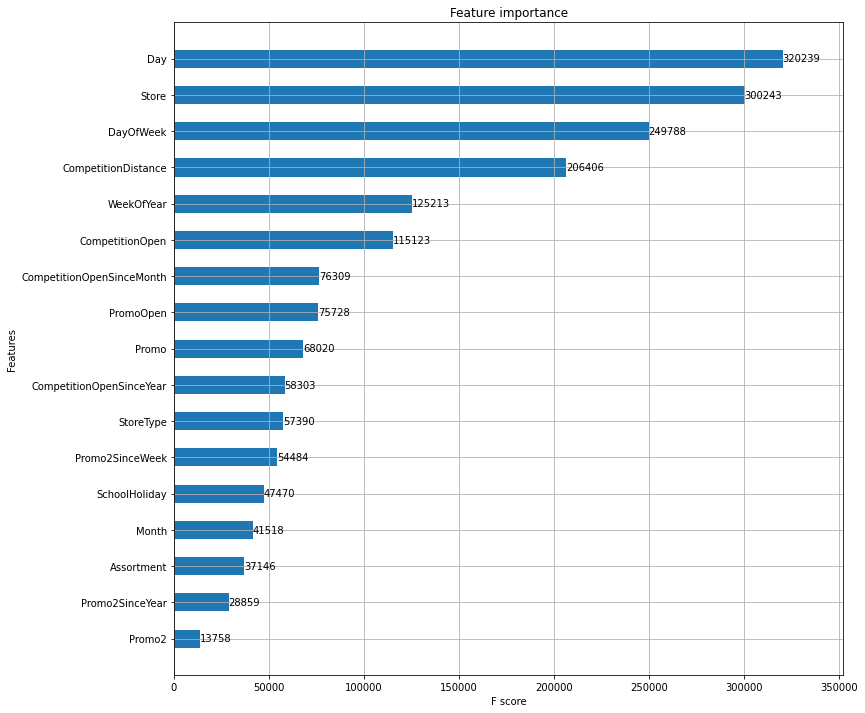

In [69]:
fig,ax = plt.subplots(figsize=(12, 12))
plot_importance(xgb_model, height=0.5, ax=ax)